# Consigna Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

Autores:



*   Diego A. Gómez
*   Natalia A. kunzmann
*   Natalia C. Grasselli
*   Patricia V. Gonzalez
*   M. Virginia Romero Messein


## Lectura del dataset


In [ ]:
# Importamos las librerías
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn
import numpy

sns.set_context('talk')

In [ ]:
#Definimos el estilo de los gráficos

#Definimos que vamos a usar una paleta de verdes y rosas
PiYG_r = sns.color_palette("PiYG_r", 10)
sns.set_palette(PiYG_r)
#sns.palplot(PiYG_r)

#Definimos que el fondo de los graficos va a ser blanco y que se va a mostrar la grilla
sns.set_style("whitegrid")

#Definimos que solo queremos que se muestren las lineas de los ejes de la izquierda y abajo
sns.despine(left=True, bottom=True)

#Definimos el tamaño de los graficos, de la fuente y de los renglones
sns.set_context("talk", font_scale = .5, rc={"grid.linewidth": 0.6})



<Figure size 432x288 with 0 Axes>

In [ ]:
# Cargamos los datos
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
# Se observan los datos en el data frame
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


Los parámetros con los que nos interesa trabajar son:


*   Salario: Optamos por salario bruto pero dejamos el salario neto para poder resolver los ejericios siguientes
*   Lenguajes de programación
*   Puesto de trabajo: hemos elegido acotar el universo de análisis únicamente a aquellos puestos donde efectivamente se programa o se requiere un conocimiento fuerte sobre un lenguaje de programación en particular: Developers, Cientistas de Datos y Testers.


In [ ]:
# Seleccionamos las columnas reelevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO', 'work_role','work_contract_type'] 

## Filtrado de valores extremos

Para evitar que el análisis se vea alterado por valores que no son representativos de la realidad, vamos a sacar aquellos elementos de la muestra donde el salario indicado supera 630.600 pesos o es inferior al SMVM ($38940). 

Elegimos el monto de $630.600 porque el 99% de los datos caen por debajo de este valor.



In [ ]:
print("Percentil 99: ", round(df["salary_monthly_BRUTO"].quantile(0.99), 2)) 


Percentil 99:  630600.0


In [ ]:
#filtramos los rangos de salarios que no nos interesan
filtered_salary_df = df[(df.salary_monthly_BRUTO > 38940) & (df.salary_monthly_BRUTO < 630600)]
filtered_salary_df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Filtrado de Roles y Contratos

Como mencionamos anteriormente, solo queremos trabajar con los roles para los cuales efectivamente se aplica un lenguaje de programación. El siguiente código permite seleccionar sólo las filas donde el valor de la columna `work role` se encuentre en la lista `interesting_roles`.

In [ ]:
filtered_salary_df['work_role'].value_counts()[:10]

Developer                         2148
SysAdmin / DevOps / SRE            642
Technical Leader                   379
QA / Tester                        226
Manager / Director                 221
Project Manager                    185
Architect                          166
HelpDesk                           153
Data Scientist / Data Engineer     132
BI Analyst / Data Analyst          125
Name: work_role, dtype: int64

In [ ]:
#  Filtramos los roles

interesting_roles = ['Developer','QA / Tester','Data Scientist / Data Engineer'] # Complete here with your selected list./Listas seleccionadas

filtered_role_df = filtered_salary_df[filtered_salary_df.work_role.isin(interesting_roles)]
filtered_role_df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
5,Hombre,25,Argentina,Ciudad Autónoma de Buenos Aires,1.0,0.0,0.0,0,Terciario,Incompleto,...,Jamás,Heterosexual,NaN,No,10001+,Producto basado en Software,8,8,"Clases de gimnasia online, Clases de idiomas, ...",NaN
6,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Producto basado en Software,7,7,"Capacitaciones y/o cursos, Clases de gimnasia ...",Mercado Libre
7,Hombre,23,Argentina,Provincia de Buenos Aires,0.0,0.0,0.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Producto basado en Software,8,10,Ninguna de las anteriores,"Globant, Accenture, Making Sense, Globalogic"


Tampoco queremos considerar aquellos trabajadores que trabajan para empresas del exterior y cuyos salarios pueden estar en dólares, ni mezclar entre salarios full time y part time, por lo que separaremos el análisis para estas dos categorías.

In [ ]:
# Filtramos los contratos
descartar_contracts = ['Part-Time', 'Remoto (empresa de otro país)'] #Sacamos part time y remoto
filtered_contract_df = filtered_role_df[~filtered_role_df.work_contract_type.isin(descartar_contracts)]

filtered_contract_df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
5,Hombre,25,Argentina,Ciudad Autónoma de Buenos Aires,1.0,0.0,0.0,0,Terciario,Incompleto,...,Jamás,Heterosexual,NaN,No,10001+,Producto basado en Software,8,8,"Clases de gimnasia online, Clases de idiomas, ...",NaN
6,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Producto basado en Software,7,7,"Capacitaciones y/o cursos, Clases de gimnasia ...",Mercado Libre
7,Hombre,23,Argentina,Provincia de Buenos Aires,0.0,0.0,0.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Producto basado en Software,8,10,Ninguna de las anteriores,"Globant, Accenture, Making Sense, Globalogic"


# Separar los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
filtered_contract_df.tools_programming_languages[:10]

1                             HTML, Javascript, Python
4               CSS, HTML, Javascript, SQL, TypeScript
5                                     Java, Javascript
6                                           Javascript
7                                     Java, Javascript
8                          Javascript, PHP, TypeScript
11                                  Bash/Shell, Python
12                     CSS, HTML, Javascript, PHP, SQL
16    .NET, C#, CSS, HTML, Javascript, SQL, TypeScript
17                              HTML, Java, Javascript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convertur string separado por comas a una lista.
# Eliminar 'ninguno de los anteriores', espacios y otras comas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Crear una columna nueva con lista de lenguajes
filtered_contract_df.loc[:, 'cured_programming_languages'] = filtered_contract_df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicar cada fila del df por cada lenguaje mencionado en la respuesta de la encuesta.
# Solo incluimos columnas a ser analizadas luego, para no duplicar información innecesaria.
df_lang = filtered_contract_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_contract_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

df_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_BRUTO,work_role,work_contract_type,cured_programming_languages
1,html,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
4,css,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,Full-Time,"[css, html, javascript, sql, typescript]"
4,html,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,Full-Time,"[css, html, javascript, sql, typescript]"


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,1365
1,sql,975
2,html,927
3,java,743
4,css,707
5,typescript,474
6,python,460
7,.net,416
8,c#,404
9,php,326


#Filtrado Lenguajes

Notamos que hay respuestas que contenian un amplia cantidad de lenguajes. Para que un lenguaje este asociado a un salario, este tiene que tener una gran relevancia para el programador. Es por eso, que se optó por descartar de la muestra a aquellas respuestas donde se indicó un número de lenguajes mayor a 7 ya que el 90% de los datos usan saben menos de 7 lenguajes. 

In [ ]:
#Contamos cuantos programming languages puso cada persona

#Se arma un diccionario que indica d = {key:value} = {n°respuesta: cant_lenguajes}
ind = list()
for row in df_lang.itertuples(index=True):
  ind.append(row[0])

d = dict((i,ind.count(i)) for i in set(ind))


In [ ]:
#Se arma una lista de las respuestas que vamos a descartar (cant_lenguajes mayor a 7)
not_wanted = list()
for i in d:
  if d[i] > 7:
    not_wanted.append(i)

print('cant de respuestas a eliminar_:',len(not_wanted)) #cantidad de respuestas que voy a descartar

#Se crea un nuevo dataset que no contenga esas respuestas
df_clean = df_lang.drop(
      labels = not_wanted,
      axis = 0,
      inplace = False)

df_clean[:5]

cant de respuestas a eliminar_: 85


,programming_language,tools_programming_languages,salary_monthly_BRUTO,work_role,work_contract_type,cured_programming_languages
1,html,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
4,css,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,Full-Time,"[css, html, javascript, sql, typescript]"
4,html,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,Full-Time,"[css, html, javascript, sql, typescript]"


Ahora las frecuencias de cada lenguaje son:

In [ ]:
language_count = df_clean.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,1283
1,sql,896
2,html,849
3,java,696
4,css,632
5,python,430
6,typescript,429
7,.net,363
8,c#,350
9,php,286


# Análisis

Queremos saber cuales son los lenguajes de programación asociados a los mejores salarios. Para ello, veamos en primer lugar como se distribuye el salario. 

In [ ]:
#Usamos describe para observar como se comportan los datos

df_clean.salary_monthly_BRUTO.describe()

count      7208.000000
mean     108941.439352
std       62287.997875
min       39000.000000
25%       67700.000000
50%       95000.000000
75%      130000.000000
max      585000.000000
Name: salary_monthly_BRUTO, dtype: float64

<Figure size 720x576 with 0 Axes>

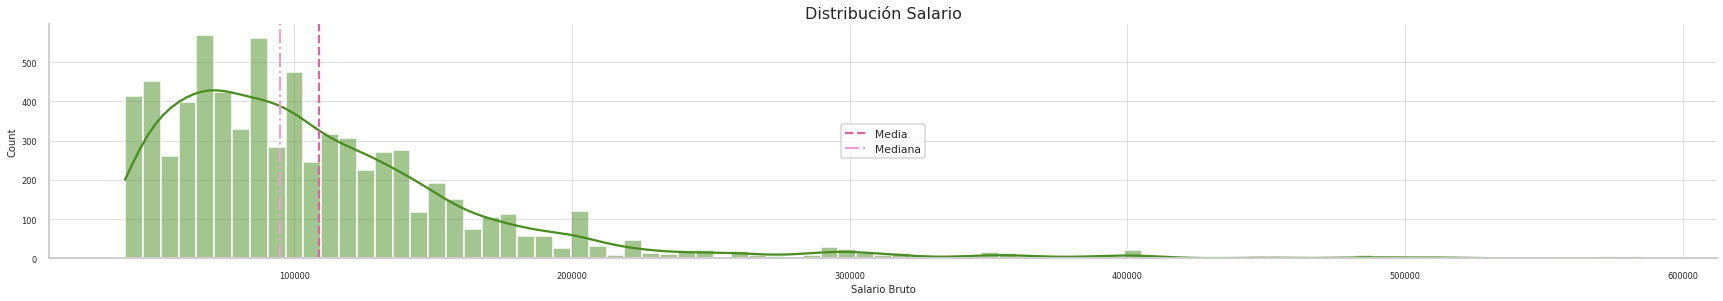

In [ ]:
#Creamos un histograma para estudiar la distribución del salario

fig= plt.figure(figsize=(10,8)); #Fijamos el tamaño del grafico

sns.displot(df_clean.salary_monthly_BRUTO.dropna(), stat='count', aspect=6, kde=True, height =4);

#Agregamos la lineas de la media
plt.axvline(x=df_clean.salary_monthly_BRUTO.mean(), 
              linestyle = '--', color=PiYG_r[8], label='Media');

#Agregamos la lineas de la mediana
plt.axvline(x=df_clean.salary_monthly_BRUTO.median(), 
              linestyle = '-.', color=PiYG_r[7], label='Mediana');

plt.xlabel("Salario Bruto", size=10)
plt.ylabel("Count", size=10)
plt.ticklabel_format(style='plain', axis='x');
plt.title("Distribución Salario", size = 16);
plt.legend(loc='center', prop={'size':'large'});
plt.show()

\Observamos así que el salario tiene una distribución asimétrica izquierda. Donde el 50% central de los programadores gana entre 67700 y 130000 pesos. 

Sin embargo, observamos también que hay algunos programadores con salarios mucho mas elevados, veamos ahora quienes se encuentran entre el 5% mejor y peor pago. 

###5% Mejor Pago

Estudiemos si hay algun lenguaje preponderante entre los trabajadores mejores pagos.

In [ ]:
#Restringimos el analsis al 5% con los mejores salarios

q_max = df_clean["salary_monthly_BRUTO"].quantile(0.95) #Buscamos los valores del quartil 95

df_best = df_clean[df_clean.salary_monthly_BRUTO >= q_max] #Creamos el dataset restringido
df_best[:3]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,work_role,work_contract_type,cured_programming_languages
26,java,"Java, Javascript, Objective-C, TypeScript",260000.0,Developer,Full-Time,"[java, javascript, objective-c, typescript]"
26,javascript,"Java, Javascript, Objective-C, TypeScript",260000.0,Developer,Full-Time,"[java, javascript, objective-c, typescript]"
26,objective-c,"Java, Javascript, Objective-C, TypeScript",260000.0,Developer,Full-Time,"[java, javascript, objective-c, typescript]"


In [ ]:
df_best.describe()

,salary_monthly_BRUTO
count,361.000000
mean,304055.257618
std,78547.235888
min,213870.000000
25%,240000.000000
50%,290000.000000
75%,350000.000000
max,585000.000000


El 5% de los programadores mejores pagos cuenta de 361 instancias, con salarios que van desde los 213870.00 pesos hasta los 585000.00 pesos, con una media de 304055.00 pesos. Observemos ahora que lenguajes de programación se asocian los mejores salarios.

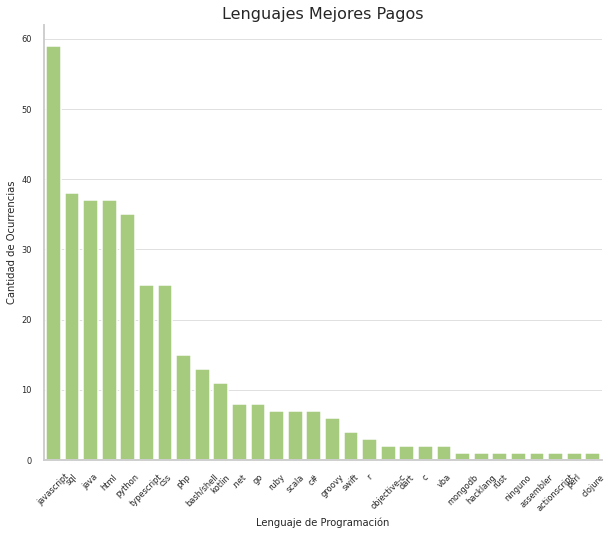

In [ ]:
#Gráfico que cuenta cuantas veces un lenguaje se encuentra dentro de los mejores pagos

fig= plt.figure(figsize=(10,8)); #Fijamos el tamaño del grafico

color_2= [PiYG_r[2],] #Fijo paleta
sns.countplot(data = df_best, x= 'programming_language', order = df_best['programming_language'].value_counts().index, palette = color_2);

plt.xlabel("Lenguaje de Programación", size=10)
plt.ylabel("Cantidad de Ocurrencias", size=10)
plt.title("Lenguajes Mejores Pagos", size = 16);
plt.xticks(rotation = 45)
sns.despine()

Así, podemos decir que entre los trabajadores mejores pagos, los lenguajes mas frecuentes son javascript, SQL, java, html y Python; en ese orden.

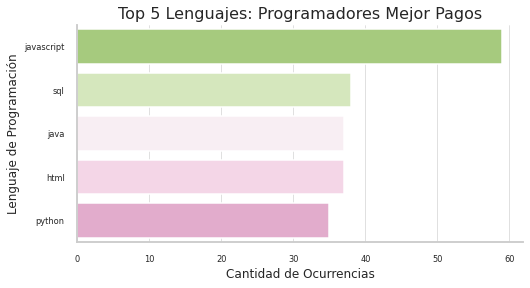

In [ ]:
#Gráfico que cuenta cuantas veces un lenguaje se encuentra dentro de los mejores pagos

best_freq_lang = df_best['programming_language'].value_counts().index[:5]

fig= plt.figure(figsize=(8,4)); #Fijamos el tamaño del grafico
colors = [PiYG_r[2],PiYG_r[3],PiYG_r[5],PiYG_r[6],PiYG_r[7],PiYG_r[8]] #Fijo los colores

sns.countplot(data = df_best[df_best.programming_language.isin(best_freq_lang)], y= 'programming_language', order = best_freq_lang, palette = colors);

plt.ylabel("Lenguaje de Programación", size=12)
plt.xlabel("Cantidad de Ocurrencias", size=12)
plt.title("Top 5 Lenguajes: Programadores Mejor Pagos", size = 16);
sns.despine()

Sin embargo, observamos también que ninguno de estos lenguajes representa un porcentaje lo suficientemente alto dentro de este conjunto. Javascript, por ejemplo, representa apenas más del 15% del total. De esta forma, creemos que no existe evidencia suficiente para determinar la existencia de un lenguaje predominante dentro del conjunto de los trabajadores mejores pagos.


In [ ]:
#Armo un df que me muestre las frecuencias en valores enteros y en porcentaje

best_perc = pd.concat([df_best['programming_language'].value_counts(),
                          df_best['programming_language'].value_counts(normalize=True).mul(100)],
                          axis=1,keys=('counts','percentage'))

In [ ]:
#Los 10 lenguajes que más aparecen entre el segmento de trabajadores mejor pagos. Frecuencia y propoción del total que representan

best_perc[:10]

,counts,percentage
javascript,59,16.343490
sql,38,10.526316
java,37,10.249307
html,37,10.249307
python,35,9.695291
typescript,25,6.925208
css,25,6.925208
php,15,4.155125
bash/shell,13,3.601108
kotlin,11,3.047091


### 5% Peor Pago

Veamos ahora que pasa dentro del conjunto de trabajadores peor pago. ¿Existe algun lenguaje que esté fuertemente asociado a este conjunto?

In [ ]:
#Restringimos el análisis a los 5% con los peores salarios

q_min = df_clean["salary_monthly_BRUTO"].quantile(0.05) #Buscamos los valores del quartil 0.05

df_worst = df_clean[df_clean.salary_monthly_BRUTO <= q_min] #Creamos el sataset restringido
df_worst[:3]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,work_role,work_contract_type,cured_programming_languages
7,java,"Java, Javascript",45000.0,Developer,Full-Time,"[java, javascript]"
7,javascript,"Java, Javascript",45000.0,Developer,Full-Time,"[java, javascript]"
112,css,"CSS, HTML, Javascript, SQL",45000.0,QA / Tester,Full-Time,"[css, html, javascript, sql]"


In [ ]:
df_worst.describe().round()

,salary_monthly_BRUTO
count,404.0
mean,42373.0
std,2156.0
min,39000.0
25%,40000.0
50%,42000.0
75%,44565.0
max,45000.0


El 5% de los programadores peor pagos cuenta de 404 instancias, con salarios que van desde los 39000.00 pesos hasta los 45000.00 pesos, con una media de 42373.00 pesos. 

Observemos ahora qué lenguajes de programación se asocian los peores salarios.

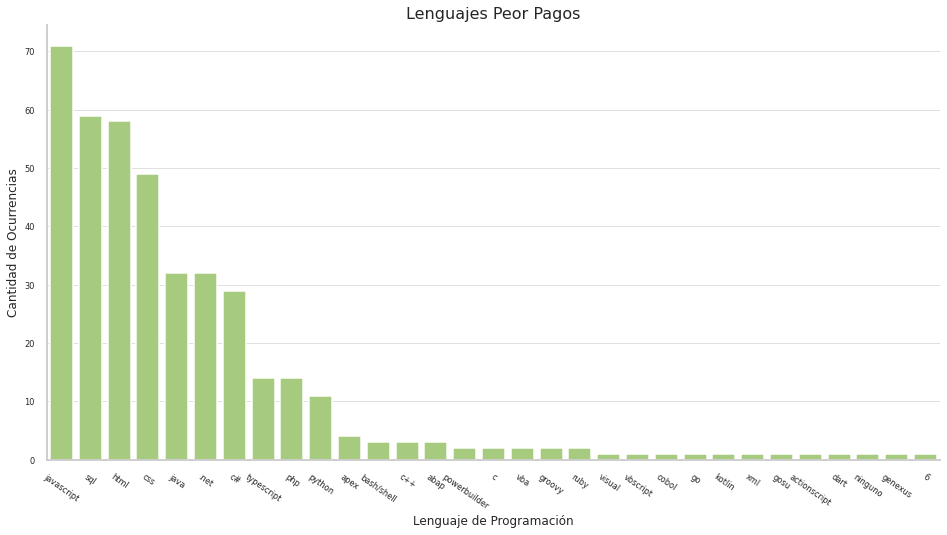

In [ ]:
#Grafico que cuenta cuantas veces un lenguaje se encuentra dentro de los peores pagos

fig= plt.figure(figsize=(16,8)); #Fijamos el tamaño del grafico


sns.countplot(data = df_worst, x= 'programming_language', order = df_worst['programming_language'].value_counts().index, palette = color_2);

plt.xlabel("Lenguaje de Programación", size=12)
plt.ylabel("Cantidad de Ocurrencias", size=12)
plt.title("Lenguajes Peor Pagos", size = 16);
plt.xticks(rotation = -35)
sns.despine()

Observamos que, nuevamente, javascript, sql y html se encuentra entre los más frecuentes. Sin embargo, si comparamos con el conjunto mejor pago, donde css aparecia séptimo en frecuencia, ahora está segundo. Python, que entre los mejores pagos tenia una frecuencia más bien alta (figuraba entre los 5 lenguajes con más frecuencia), ahora figura noveno en la lista. 

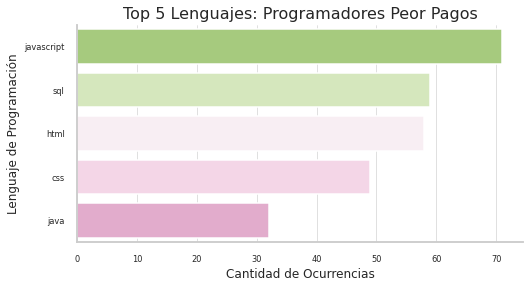

In [ ]:
#Gráfico que cuenta cuantas veces un lenguaje se encuentra dentro de los peor pagos

worst_freq_lang = df_worst['programming_language'].value_counts().index[:5]

fig= plt.figure(figsize=(8,4)); #Fijamos el tamaño del grafico

sns.countplot(data = df_worst[df_worst.programming_language.isin(worst_freq_lang)], y= 'programming_language', order = worst_freq_lang, palette = colors);

plt.ylabel("Lenguaje de Programación", size=12)
plt.xlabel("Cantidad de Ocurrencias", size=12)
plt.title("Top 5 Lenguajes: Programadores Peor Pagos", size = 16);
sns.despine()

Observamos que este conjunto se encuentra un poco más concentrado que el anterior. Además, notamos que javascript + css + html + typescript, que son lenguajes comunmente asociados al desarrollo front end, representan a un 47.5% del total de los peores salarios. 

In [ ]:
#Armamos un df que muestra las frecuencias en valores enteros y en porcentaje

worst_perc = pd.concat([df_worst['programming_language'].value_counts(),
                          df_worst['programming_language'].value_counts(normalize=True).mul(100)],
                          axis=1,keys=('counts','percentage'))

In [ ]:
#Los 10 lenguajes que más aparecen entre el segmento de trabajadores peor pagos. Frecuencia y propoción del total que representan

worst_perc[:10]

,counts,percentage
javascript,71,17.574257
sql,59,14.603960
html,58,14.356436
css,49,12.128713
java,32,7.920792
.net,32,7.920792
c#,29,7.178218
typescript,14,3.465347
php,14,3.465347
python,11,2.722772


In [ ]:
#Miramos cuanto representan los lenguajes de front end dentro del conjunto peor pago

front_end_lang = ['javascript','html','css','typescript']
worst_perc[worst_perc.index.isin(front_end_lang)].sum()

counts        192.000000
percentage     47.524752
dtype: float64

### Lenguajes más populares

Ya observamos que hay algunos lenguajes que tienen mayor frecuencia que otros dentro de los dos conjuntos analizados. Algunos de ellos, como javascript, tienen una fuerte presencia en ambos conjuntos; mientras que otros, como python, tienen una presencia mucho mas fuerte en el conjunto mejor pago que en el peor pago; y otros, como css, al revés. 

Nos preguntamos sin embargo, estos lenguajes aparecen mucho en el conjunto mejor o peor pago simplemente porque son lenguajes mucho mas populares que otros a nivel geneal? Comparemos

In [ ]:
#Creamos un df con la frecuencia de cada lenguaje (en valores y en porcentaje) para todos los salarios. 

general_perc = pd.concat([df_clean['programming_language'].value_counts(),
                          df_clean['programming_language'].value_counts(normalize=True).mul(100)],
                          axis=1,keys=('counts','percentage'))

general_perc[:10]

,counts,percentage
javascript,1283,17.799667
sql,896,12.430633
html,849,11.778579
java,696,9.655938
css,632,8.768036
python,430,5.965594
typescript,429,5.951720
.net,363,5.036071
c#,350,4.855716
php,286,3.967814


Ahora vamos a comparar gráficamente las frecuencias de cada lenguaje dentro de los subconjuntos analizados: general (todos los salarios), 5% mejor pago, 5% peor pago. Sin embargo, no vamos a comparar todos los lenguajes que figuran en la encuesta, sino que solo vamos a enfocarnos en aquellos que entraron en el top 5 de alguna de las tres categorias.

In [ ]:
#Lenguajes que entraron en el top 5 de los peores salarios
top5_worst = df_worst['programming_language'].value_counts().index[:5]
print('top 5 peores:', top5_worst)

#Lenguajes que entraron en el top 5 de los mejores salarios
top5_best = df_best['programming_language'].value_counts().index[:5]
print('top 5 mejores:', top5_best)

#Lenguajes que entraron en el top 5 general
top5_grl = df_clean['programming_language'].value_counts().index[:5]
print('top 5 general:', top5_grl)

top 5 peores: Index(['javascript', 'sql', 'html', 'css', 'java'], dtype='object')
top 5 mejores: Index(['javascript', 'sql', 'java', 'html', 'python'], dtype='object')
top 5 general: Index(['javascript', 'sql', 'html', 'java', 'css'], dtype='object')


In [ ]:
#El conjunto total a analizar está formado por:

interesting_languages = ['javascript', 'sql', 'html', 'css', 'java','python']

Observamos que javascript y sql figuran primeros en los 3 conjuntos. En cambio, css no ingresa dentro del top 5 de los mejores, a pesar de que es de los más populares en el conjunto general y en el de los peores salarios. Python, en cambio queda entre los mejores a pesar de no ser de los mas populares a nivel general. Visualicemos como son estos cambios:

In [ ]:
#Creamos un df con las frecuencias en cada conjunto para los lenguajes que nos interesan
df_perc = pd.concat([general_perc[general_perc.index.isin(interesting_languages)].percentage, best_perc[best_perc.index.isin(interesting_languages)].percentage, worst_perc[worst_perc.index.isin(interesting_languages)].percentage],
                      axis=1, 
                      keys=('general','best', 'worst'))
df_perc[:6]

,general,best,worst
javascript,17.799667,16.343490,17.574257
sql,12.430633,10.526316,14.603960
html,11.778579,10.249307,14.356436
java,9.655938,10.249307,7.920792
css,8.768036,6.925208,12.128713
python,5.965594,9.695291,2.722772


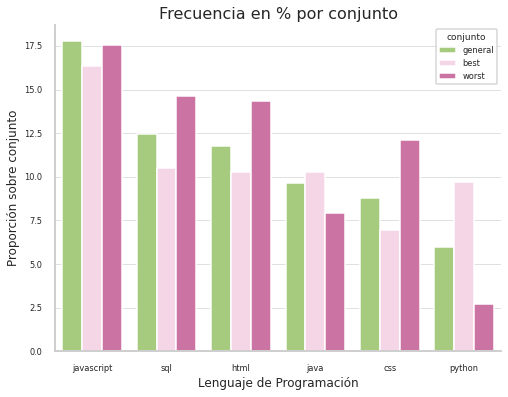

In [ ]:
#Ampliamos las columnas para poder usar hue

df_stacked = df_perc.stack().reset_index()
df_stacked.columns = ["lenguaje", "conjunto", "percentage"]
df_stacked.index = df_stacked["lenguaje"]

#Fijamos los colores para el hue
palette = {'general':PiYG_r[2], 'best':PiYG_r[6], 'worst':PiYG_r[8]}

#Creamos el plot
fig= plt.figure(figsize=(8,6));

sns.barplot(x=df_stacked.index, y="percentage", hue="conjunto", data=df_stacked, palette=palette);


plt.xlabel("Lenguaje de Programación", size=12)
plt.ylabel("Proporción sobre conjunto", size=12)
plt.title("Frecuencia en % por conjunto", size = 16);
sns.despine()

Observamos así que:


*   Javascript tiene una alta frecuencia en los 3 conjuntos y no hay un cambio significativo entre un conjunto y otro. Por lo que podemos decir que su presencia en los conjuntos extremos (mejor y peor), no se debe a una relación especifica con ello; sino simplemente a su popularidad.

*   SQL y html, que tienen una frecuencia similar en los 3 conjuntos con una tendencia levemente mayor en el conjunto de los peores lenguajes por sobre los mejores. Su presencia en este conjunto (el 5% inferior), supera a la de otros lenguajes a los que también supera en frecuencia en los otros conjuntos. 

*   CSS tiene una frecuencia mucho mayor en el conjunto de los peores salarios que en los otros dos conjuntos. Además, su presencia en este conjunto supera a la de otros lenguajes a los que no supera en frecuencia en los otros dos conjuntos. Podemos concluir que es un lenguaje que se puede asociar a peores salarios. 

*   Python tiene una presencia mucho mayor dentro del conjunto de los mejores salarios que en los otros dos conjuntos. Además, su presencia en este conjunto supera a la de otros lenguajes a los que no supera en frecuencia en los otros dos conjuntos. Podemos concluir que es un lenguaje que se puede asociar a mejores salarios. 

*   Con Java, sucede algo similar a lo que ocurre con Python, pero con en menor medida; es decir, las diferencias son mas pequeñas. 



Observemos que estas conclusiones también quedan en evidencia si observamos la distribución del salario para los lenguajes elegidos. 

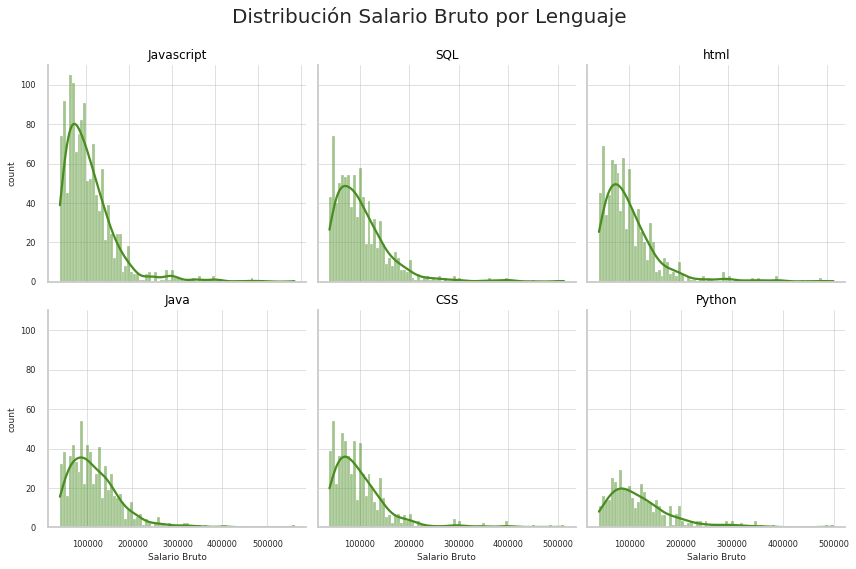

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True);
fig.suptitle('Distribución Salario Bruto por Lenguaje', size = 20) #Titulo para la figura

#Grafico Javascript
js = sns.histplot(df_clean.salary_monthly_BRUTO[df_clean.programming_language == 'javascript'], 
                  bins = 80, kde=True, ax = axes[0,0]);
js.set_title("Javascript", size=12, color='black');

#Grafico SQL
sql = sns.histplot(df_clean.salary_monthly_BRUTO[df_clean.programming_language == 'sql'], 
                  bins = 80, kde=True, ax = axes[0,1]);
sql.set_title("SQL", size=12, color='black');

#Grafico html
html = sns.histplot(df_clean.salary_monthly_BRUTO[df_clean.programming_language == 'html'], 
                  bins = 80, kde=True, ax = axes[0,2]);
html.set_title("html", size=12, color='black');

#Grafico java
java = sns.histplot(df_clean.salary_monthly_BRUTO[df_clean.programming_language == 'java'], 
                  bins = 80, kde=True, ax = axes[1,0]);
java.set_title("Java", size=12, color='black');

#Grafico css
css = sns.histplot(df_clean.salary_monthly_BRUTO[df_clean.programming_language == 'css'], 
                  bins = 80, kde=True, ax = axes[1,1]);
css.set_title("CSS", size=12, color='black');

#Grafico py
py = sns.histplot(df_clean.salary_monthly_BRUTO[df_clean.programming_language == 'python'], 
                  bins = 80, kde=True, ax = axes[1,2]);
py.set_title("Python", size=12, color='black');


for ax in axes.flat:
    ax.set(xlabel='Salario Bruto', ylabel='count') #Set axes name
    ax.label_outer() # Hide x labels and tick labels for top plots and y ticks for right plots.

# Agregamos tight layout y espaciamos los titulos de manera acorde
fig.tight_layout()
fig.subplots_adjust(top=0.88)
sns.despine()

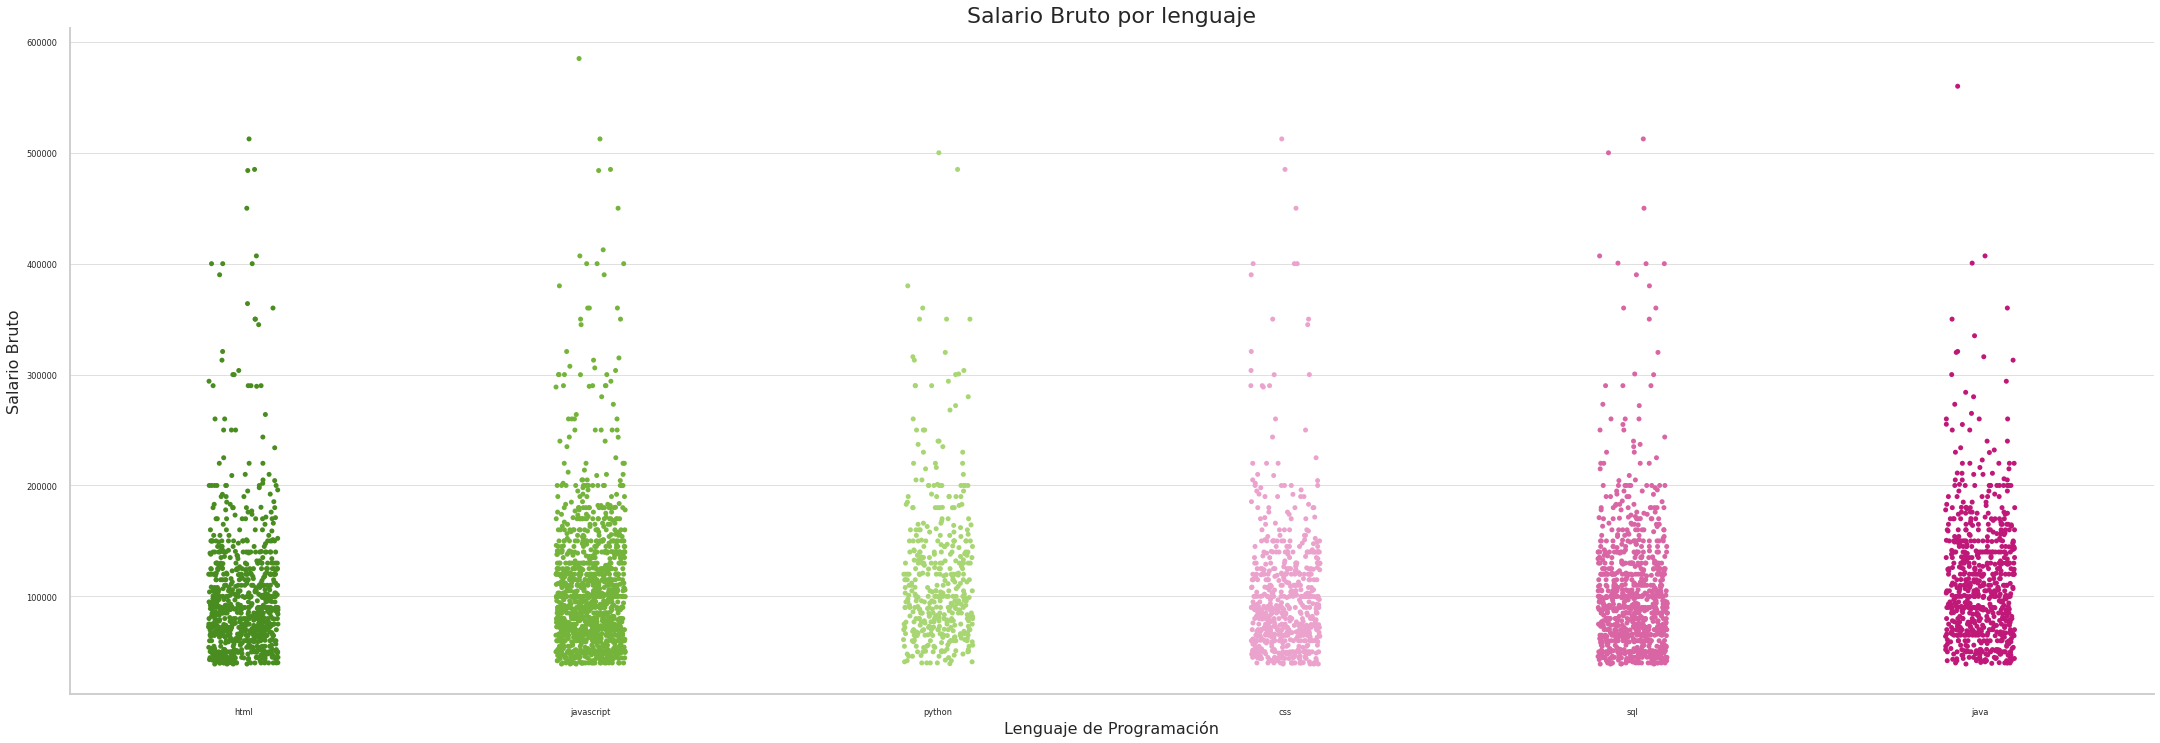

In [ ]:
colors_lang = [PiYG_r[0],PiYG_r[1],PiYG_r[2], PiYG_r[7],PiYG_r[8],PiYG_r[9]]

sns.catplot(data=df_clean[df_clean.programming_language.isin(interesting_languages)], x='programming_language',
                y='salary_monthly_BRUTO', height=10, aspect=3, palette = colors_lang)

plt.xlabel("Lenguaje de Programación", size=16)
plt.ylabel("Salario Bruto", size=16)
plt.title("Salario Bruto por lenguaje", size = 22);
sns.despine()
plt.show()

Finalmente, podemos comparar las medidas estadisticas centrales de estos lenguajes para conocer un poco mas sobre el salario para estos lenguajes tan populares. 

In [ ]:
#Creamos un df que tenga solo los lenguajes que nos importan

df_int_lang = df_clean[df_clean.programming_language.isin(interesting_languages)]

df_int_lang[:3]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,work_role,work_contract_type,cured_programming_languages
1,html,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,Developer,Full-Time,"[html, javascript, python]"


Si estudiamos la mediana, podemos ver que **la mayoría de los trabajadores de Java tiene un salario por encima que la mayoría de los trabajadores de los demas lenguajes**. Lo mismo sucede con Python, donde los salarios de la mayoría de sus trabajadores supera ampliamente a los salarios de la mayoría de los trabajadores de otros lenguaje; excepto de java, del cual se encuentra muy cerca.

In [ ]:
#Calculamos la mediana para cada lenguaje

df_int_lang.groupby(df_int_lang['programming_language']).median()

,salary_monthly_BRUTO
programming_language,
css,89000.0
html,89000.0
java,105000.0
javascript,94000.0
python,104000.0
sql,90000.0


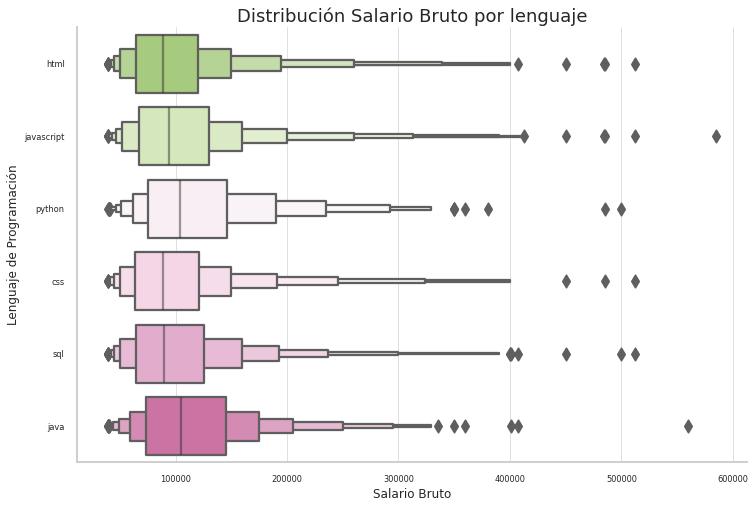

In [ ]:
#Box and Whiskers Plot por lenguaje
plt.figure(figsize=(12, 8))

sns.boxenplot(data=df_int_lang, x=df_int_lang['salary_monthly_BRUTO'], y=df_int_lang['programming_language'], palette = colors);

plt.ticklabel_format(style='plain', axis='x')
plt.ylabel("Lenguaje de Programación", size=12)
plt.xlabel("Salario Bruto", size=12)
plt.title("Distribución Salario Bruto por lenguaje", size = 18);
sns.despine()
plt.show()

Observemos también que **la mayoría de los programadores que saben Python y/o Java poseen salarios que superan a los salarios de la mayoría de los programadores, independientemente del lenguaje en que programen**. 

In [ ]:
mediana_grl = df_clean.salary_monthly_BRUTO.median()

print('mediana para todos los lenguajes', mediana_grl)

mediana para todos los lenguajes 95000.0


Ahora, si estudiamos el salario medio para cada lenguaje, podemos decir que **el lenguaje de programación con el mejor salario promedio es Python**, seguido de java. Esto refuerza las conclusiones anteriores.

In [ ]:
#Calculamos la media para cada lenguaje

df_int_lang.groupby(df_int_lang['programming_language']).mean()

,salary_monthly_BRUTO
programming_language,
css,101886.089604
html,102763.257797
java,116207.450618
javascript,107672.409299
python,121177.591581
sql,104284.396016


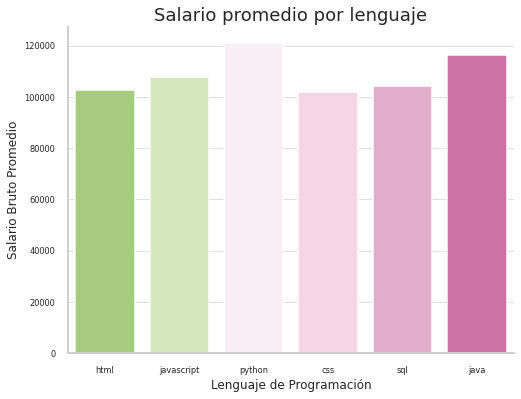

In [ ]:
#Histograma de medias

fig = plt.figure(figsize=(8,6)) #Fijamos el tamaño del grafico

sns.barplot(y=df_int_lang['salary_monthly_BRUTO'], x=df_int_lang['programming_language'],
                estimator=np.mean, ci=None, palette =colors) 

plt.xlabel("Lenguaje de Programación", size=12)
plt.ylabel("Salario Bruto Promedio", size=12)
plt.title("Salario promedio por lenguaje", size = 18);
sns.despine()

En particular, podemos calcular **cuantos programadores de python ganan por encima de la media de los demas lenguajes**.

In [ ]:
#Esto esta horrible pero funciona qsy

#creo un df exclusivo de python
py_df = df_int_lang[df_int_lang.programming_language == 'python']

#Creamos un df con el nombre del lenguaje, la media para ese lenguaje, la proporción de trabajadores de python que superan esa media

abv = list()
media = list()

#Para cada lenguaje, calculo su media y la proporción de trabajadores de python que lo superan

for lang in interesting_languages:
  avg_sal = df_int_lang.salary_monthly_BRUTO[df_int_lang.programming_language == lang].mean()
  media.append(avg_sal) #voy guardando las medias en una lista
  p_above_avg = len(py_df[py_df['salary_monthly_BRUTO'] >= avg_sal]) / len(py_df)
  abv.append(p_above_avg) #voy guardando las proporciones en una lista

details = {'lenguaje': interesting_languages, 'media':media, 'proporcion':abv} #a cada lista le doy el titulo de la columna
df_above = pd.DataFrame(details) #creo el df

df_above[:]

,lenguaje,media,proporcion
0,javascript,107672.409299,0.479070
1,sql,104284.396016,0.497674
2,html,102763.257797,0.506977
3,css,101886.089604,0.511628
4,java,116207.450618,0.427907
5,python,121177.591581,0.381395


Así, podemos decir que:

*   La mayoria de los programadores que saben Python ganan mas que el salario promedio de un programador que sabe html o css
*   La mitad de los programadores de Python ganan más que el salario promedio de un programador que sabe SQL
*   El 48% de los programadores de Python ganan más que el salario promedio de un programador que sabe javascript
*   El 4% de los programadores de Python ganan más que el salario promedio de un programador que sabe java

Si observamos esto mismo pero **para programadores de java**:

In [ ]:
#Repetimos pero para java

#creo un df exclusivo de python
java_df = df_int_lang[df_int_lang.programming_language == 'java']

#Creamos un df con el nombre del lenguaje, la media para ese lenguaje, la proporción de trabajadores de Python que superan esa media

abv_java = list()
media_java = list()

#Para cada lenguaje, calculo su media y la proporción de trabajadores de Python que lo superan

for lang in interesting_languages:
  avg_sal = df_int_lang.salary_monthly_BRUTO[df_int_lang.programming_language == lang].mean()
  media_java.append(avg_sal) #voy guardando las medias en una lista
  p_above_avg_java = len(java_df[java_df['salary_monthly_BRUTO'] >= avg_sal]) / len(java_df)
  abv_java.append(p_above_avg_java) #voy guardando las proporciones en una lista

details = {'lenguaje': interesting_languages, 'media':media_java, 'proporcion':abv_java} #a cada lista le doy el titulo de la columna
df_above_java = pd.DataFrame(details) #creo el df

df_above_java[:]

,lenguaje,media,proporcion
0,javascript,107672.409299,0.484195
1,sql,104284.396016,0.507184
2,html,102763.257797,0.512931
3,css,101886.089604,0.521552
4,java,116207.450618,0.420977
5,python,121177.591581,0.387931


Podemos decir que:

*   La mayoria de los programadores que saben Java ganan mas que el salario promedio de un programador que sabe SQL, html o css
*   El 48% de los programadores de Java ganan más que el salario promedio de un programador que sabe javascript
*   Solo el 38% de los programadores de Java ganan más que el salario promedio de un programador que sabe Python

Finalmente, comparemos las medias de los lenguajes con la media general de los programadores. 

In [ ]:
#Calculo media sin distinguir lenguaje de programación (incluye no populares)
media_grl = df_clean.salary_monthly_BRUTO.mean()

print('media para todos los lenguajes', media_grl)

media para todos los lenguajes 108941.4393521088


In [ ]:
java_above_avg_grl = len(java_df[java_df['salary_monthly_BRUTO'] >= media_grl]) / len(java_df)
py_above_avg_grl = len(py_df[py_df['salary_monthly_BRUTO'] >= media_grl]) / len(py_df)

print ('el', py_above_avg_grl,'% de los programadores que saben Python ganan más que la media de la industria')
print ('el', java_above_avg_grl ,'% de los programadores que saben Java ganan más que la media de la industria')

el 0.4720930232558139 % de los programadores que saben Python ganan más que la media de la industria
el 0.4755747126436782 % de los programadores que saben Java ganan más que la media de la industria


Observamos así que **el salario promedio de un programador de Python y el salario promedio de un programador de Java se encuentran por encima del salario promedio de la industria**. 

##Conclusiones

De esta manera, podemos concluir que **Python** es un lenguaje frecuente entre aquellos programadores que tienen los mejores salarios de la industria(entro en el top 5). A diferencia de otros lenguajes de programación muy populares, no es tan frecuente encontrar un trabajador que sepa Python entre aquellos programadores que ganan menos. 

Tiene asociado un salario promedio superior al salario promedio asociado a cualquier otro lenguaje popular del mercado; en particular, es superior al salario primedio de la industria. Más aun, la mayoría de los trabajadores que saben Python ganan más que el salario promedio de la industria en general y que el salario promedio asociado a cualquiera de los otros lenguajes más populares. 

La mayoría de los trabajadores de Python ganan más la mayoría de los trabajadores de la industria.

El lenguaje asociado al segundo mejor salario promedio de la industria es **Java**. La mayoría de los programadores que sabe java no solo gana más que la mayoría de los trabajadores de la industría, sino que gana más que la mayoría de los programadores que saben cualquiera de los otros lenguajes populares del mercado; inclusive que los programadores de Python, a pesar de que la media de estos es superior. 

Por otro lado, los programadores que saben **CSS** aparecen más comunmente entre aquellos programadores que tienen sueldos malos que entre aquellos que tienen sueldos buenos. Su salario medio es inferior al salario medio de los otros lenguajes populares, e inferior al salario medio de la industria en general. Más aun, la mayoría de los programadores que saben css ganan menos que la mayoría de los trabajadores de la industria. Esto último se repite para html y para javascript. 


Así que sí, hicimos bien (por suerte!!) de inscribirnos a la diplomatura en data science donde usamos Python, y no al curso de front end que nos recomendó un amigo :)


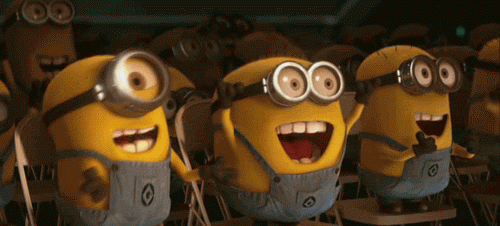